In [89]:
### IMPORTS ###
import os
import pandas as pd
import jellyfish
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv(os.path.join('Data', 'PropertyMatching', 'full_dataset.csv'), index_col=0)

/Users/Play/anaconda3/envs/knowledge-representation-2/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,LMDB_URI,LMDB_DB_link,DB_URI,LMDB_title,DB_title,LMDB_runtime,DB_runtime,GROUND_TRUTH,TITLE_MATCH,RUNTIME_MATCH,EXACT_MATCH
0,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,Bicentennial Man,132,120.0,True,True,False,False
1,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Hand_(film),Bicentennial Man,The Hand,132,104.0,False,False,False,False
2,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Telegraph_Trail,Bicentennial Man,The Telegraph Trail,132,54.0,False,False,False,False
3,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Eye_of_the_Needle_...,Bicentennial Man,Eye of the Needle,132,112.0,False,False,False,False
4,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/A_Smoky_Mountain_C...,Bicentennial Man,A Smoky Mountain Christmas,132,94.0,False,False,False,False


In [4]:
### CALCULATE ABSOLUTE RUNTIME DISTANCE ###
df['ABS_RUNTIME_DISTANCE'] = df['LMDB_runtime'] - df['DB_runtime']
df['ABS_RUNTIME_DISTANCE'] = df['ABS_RUNTIME_DISTANCE'].abs()

In [5]:
### CALCUALTE LEVEHSHENSHSTHEE TITLE DISTANCE ###
def rowwise_levenshtein(row):
    return jellyfish.levenshtein_distance(row['LMDB_title'], row['DB_title'])
df['LEV_TITLE_DISTANCE'] = df.apply(rowwise_levenshtein, axis=1)

In [6]:
### NORMALIZE DISTANCE MEASURES TO 0-1 ###
df['ABS_RUNTIME_DISTANCE'] = (df['ABS_RUNTIME_DISTANCE'] - df['ABS_RUNTIME_DISTANCE'].min()) / (df['ABS_RUNTIME_DISTANCE'].max() - df['ABS_RUNTIME_DISTANCE'].min())
df['LEV_TITLE_DISTANCE'] = (df['LEV_TITLE_DISTANCE'] - df['LEV_TITLE_DISTANCE'].min()) / (df['LEV_TITLE_DISTANCE'].max() - df['LEV_TITLE_DISTANCE'].min())
df.head()

,LMDB_URI,LMDB_DB_link,DB_URI,LMDB_title,DB_title,LMDB_runtime,DB_runtime,GROUND_TRUTH,TITLE_MATCH,RUNTIME_MATCH,EXACT_MATCH,ABS_RUNTIME_DISTANCE,LEV_TITLE_DISTANCE
0,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Bicentennial_Man_(...,Bicentennial Man,Bicentennial Man,132,120.0,True,True,False,False,0.002041,0.000000
1,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Hand_(film),Bicentennial Man,The Hand,132,104.0,False,False,False,False,0.004762,0.121495
2,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/The_Telegraph_Trail,Bicentennial Man,The Telegraph Trail,132,54.0,False,False,False,False,0.013265,0.140187
3,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/Eye_of_the_Needle_...,Bicentennial Man,Eye of the Needle,132,112.0,False,False,False,False,0.003401,0.158879
4,http://data.linkedmdb.org/resource/film/6235,http://dbpedia.org/resource/Bicentennial_Man_(...,http://dbpedia.org/resource/A_Smoky_Mountain_C...,Bicentennial Man,A Smoky Mountain Christmas,132,94.0,False,False,False,False,0.006463,0.205607


In [56]:
### COMPUTE FUZZY SCORE AS A LINEAR COMBINATION OF THE 2 DISTANCES ###
df['FUZZY_SCORE'] = 1 - (0.8 * df['LEV_TITLE_DISTANCE'] + 0.2 * df['ABS_RUNTIME_DISTANCE'])

In [57]:
### SAVE THE CSV WILL ALL FEATURES ###
df.to_csv(os.path.join('Data', 'PropertyMatching', 'full_dataset.csv'))

In [82]:
### DESCRIBE POSTIVE INSTANCES ###
df[df['GROUND_TRUTH']]['FUZZY_SCORE'].describe()

count    2240.000000
mean        0.995070
std         0.028313
min         0.312150
25%         0.999898
50%         1.000000
75%         1.000000
max         1.000000
Name: FUZZY_SCORE, dtype: float64

In [83]:
### DESCRIBE NEGATIVE INSTANCES ###
df[-df['GROUND_TRUTH']]['FUZZY_SCORE'].describe()

count    4.873024e+06
mean     8.810078e-01
std      4.718521e-02
min      1.956463e-01
25%      8.575017e-01
50%      8.874423e-01
75%      9.102123e-01
max      9.994898e-01
Name: FUZZY_SCORE, dtype: float64

In [95]:
### CALCUALTE QUALITY MEASURES ###
threshold = 0.99
positive_median = df[df['GROUND_TRUTH']]['FUZZY_SCORE'].median()
negative_median = df[-df['GROUND_TRUTH']]['FUZZY_SCORE'].median()

positive_mean = df[df['GROUND_TRUTH']]['FUZZY_SCORE'].mean()
negative_mean = df[-df['GROUND_TRUTH']]['FUZZY_SCORE'].mean()

positive_mean = df[df['GROUND_TRUTH']]['FUZZY_SCORE'].mean()
negative_mean = df[-df['GROUND_TRUTH']]['FUZZY_SCORE'].mean()

retrieved = df[df['FUZZY_SCORE'] >= threshold].shape[0]
relevant = df[df['GROUND_TRUTH']].shape[0]
relevant_and_retrieved = df[(df['GROUND_TRUTH']) & (df['FUZZY_SCORE'] >= threshold)].shape[0]
non_relevant_and_non_retrieved = df[(-df['GROUND_TRUTH']) & (df['FUZZY_SCORE'] < threshold)].shape[0]

accuracy = (relevant_and_retrieved + non_relevant_and_non_retrieved) / df.shape[0]
precision = relevant_and_retrieved / retrieved
recall = relevant_and_retrieved / relevant

print("  POSITIVE MEAN: ", positive_mean)
print("  NEGATIVE MEAN: ", negative_mean)
print("POSITIVE MEDIAN: ", positive_median)
print("NEGATIVE MEDIAN: ", negative_median)
print("       ACCURACY: ", accuracy)
print("      PRECISION: ", precision)
print("         RECALL: ", recall)

  POSITIVE MEAN:  0.9950697543308878
  NEGATIVE MEAN:  0.8810078233604658
POSITIVE MEDIAN:  1.0
NEGATIVE MEDIAN:  0.8874423040244135
       ACCURACY:  0.9999739501286494
      PRECISION:  0.989800649049606
         RECALL:  0.953125


In [96]:
thresholds = []
accuracies = []
precisions = []
recalls = []
for idx, threshold in enumerate(np.arange(0.0, 1.01, 0.01)):
    print(idx, threshold)
    retrieved = df[df['FUZZY_SCORE'] >= threshold].shape[0]
    relevant = df[df['GROUND_TRUTH']].shape[0]
    relevant_and_retrieved = df[(df['GROUND_TRUTH']) & (df['FUZZY_SCORE'] >= threshold)].shape[0]
    non_relevant_and_non_retrieved = df[(-df['GROUND_TRUTH']) & (df['FUZZY_SCORE'] < threshold)].shape[0]

    accuracy = (relevant_and_retrieved + non_relevant_and_non_retrieved) / df.shape[0]
    precision = relevant_and_retrieved / retrieved
    recall = relevant_and_retrieved / relevant
    
    thresholds.append(threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)


0 0.0
1 0.01
2 0.02
3 0.03
4 0.04
5 0.05
6 0.06
7 0.07
8 0.08
9 0.09
10 0.1
11 0.11
12 0.12
13 0.13
14 0.14
15 0.15
16 0.16
17 0.17
18 0.18
19 0.19
20 0.2
21 0.21
22 0.22
23 0.23
24 0.24
25 0.25
26 0.26
27 0.27
28 0.28
29 0.29
30 0.3
31 0.31
32 0.32
33 0.33
34 0.34
35 0.35000000000000003
36 0.36
37 0.37
38 0.38
39 0.39
40 0.4
41 0.41000000000000003
42 0.42
43 0.43
44 0.44
45 0.45
46 0.46
47 0.47000000000000003
48 0.48
49 0.49
50 0.5
51 0.51
52 0.52
53 0.53
54 0.54
55 0.55
56 0.56
57 0.5700000000000001
58 0.58
59 0.59
60 0.6
61 0.61
62 0.62
63 0.63
64 0.64
65 0.65
66 0.66
67 0.67
68 0.68
69 0.6900000000000001
70 0.7000000000000001
71 0.71
72 0.72
73 0.73
74 0.74
75 0.75
76 0.76
77 0.77
78 0.78
79 0.79
80 0.8
81 0.81
82 0.8200000000000001
83 0.8300000000000001
84 0.84
85 0.85
86 0.86
87 0.87
88 0.88
89 0.89
90 0.9
91 0.91
92 0.92
93 0.93
94 0.9400000000000001
95 0.9500000000000001
96 0.96
97 0.97
98 0.98
99 0.99
100 1.0


Text(0,0.5,'Accuracy')

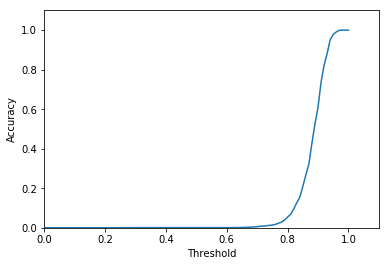

In [105]:
plot(thresholds, accuracies)
xlim([0,1.1])
ylim([0,1.1])
xlabel('Threshold')
ylabel('Accuracy')

Text(0,0.5,'Precision')

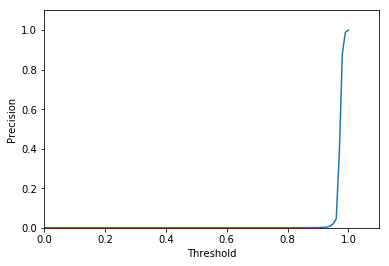

In [106]:
plot(thresholds, precisions)
xlim([0,1.1])
ylim([0,1.1])
xlabel('Threshold')
ylabel('Precision')

Text(0,0.5,'Recall')

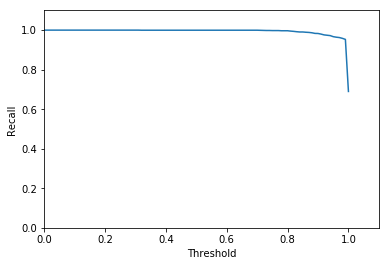

In [107]:
plot(thresholds, recalls)
xlim([0,1.1])
ylim([0,1.1])
xlabel('Threshold')
ylabel('Recall')

In [118]:
print(accuracies[75])
print(precisions[75])
print(recalls[75])

0.013861198080760345
0.0004646649827845262
0.9977678571428571


In [117]:
print(accuracies[100])
print(precisions[100])
print(recalls[100])

0.9998574436174124
1.0
0.6897321428571429


In [119]:
print(accuracies[99])
print(precisions[99])
print(recalls[99])

0.9999739501286494
0.989800649049606
0.953125
